In [131]:
# import libraries
# DataFrame
import pandas as pd

# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# sklearny
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB


#tensorflow
import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds

# Utility
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import re
import string
import pickle

# Loading Dataset

In [132]:
# Construct a tf.data.Dataset
data = pd.read_csv('training.1600000.processed.noemoticon.csv',encoding='latin', names = ['polarity','id','date','query','user','text'])

In [133]:
# Random shuffling of data, select the first 200,000
data = data.sample(frac=1)
data = data[:20000]

# Data Visualization

In [134]:
print("Dataset shape:", data.shape)

Dataset shape: (20000, 6)


In [135]:
data.head(10)

,polarity,id,date,query,user,text
842281,4,1563640823,Sun Apr 19 23:38:03 PDT 2009,NO_QUERY,haveanaviday,my sleepy head http://twitpic.com/3n98u
545117,0,2201327144,Tue Jun 16 20:07:14 PDT 2009,NO_QUERY,TheGrulkster,...Even though sleep will probably be a little...
921017,4,1754098703,Sun May 10 04:58:21 PDT 2009,NO_QUERY,fajarjasmin,@waxinglyrical Paperbag ? I think it's for hyp...
1226449,4,1990842360,Mon Jun 01 05:52:03 PDT 2009,NO_QUERY,Secrenax,is going to sleep after watching Maria Watches...
30406,0,1563756155,Mon Apr 20 00:07:37 PDT 2009,NO_QUERY,mariee_,She's too busy to read my blabs.
913554,4,1752645176,Sat May 09 22:31:33 PDT 2009,NO_QUERY,RocsiBoo92,Bout to go to bed... Happy Mother's Day ladies...
237453,0,1980206579,Sun May 31 06:02:33 PDT 2009,NO_QUERY,ubinam_rosarium,Q: by @nprLianeHansen &quot;Favorite childhood...
1012031,4,1881160567,Fri May 22 03:48:08 PDT 2009,NO_QUERY,fashionfeedofsl,shares 'Linka:In da house part 2' - http://ti...
29836,0,1563598783,Sun Apr 19 23:27:52 PDT 2009,NO_QUERY,explodingfish,"wow its already 12:30pm, I think i should go t..."
1287021,4,2002317539,Tue Jun 02 03:51:24 PDT 2009,NO_QUERY,smart_kookie,im away to get breakfast with @mini_moop. brb ...


In [136]:
data['polarity'].unique()

array([4, 0])

In [137]:
# Replacing the value 4 -->1 for ease of understanding.
data['polarity'] = data['polarity'].replace(4,1)
data.head()

,polarity,id,date,query,user,text
842281,1,1563640823,Sun Apr 19 23:38:03 PDT 2009,NO_QUERY,haveanaviday,my sleepy head http://twitpic.com/3n98u
545117,0,2201327144,Tue Jun 16 20:07:14 PDT 2009,NO_QUERY,TheGrulkster,...Even though sleep will probably be a little...
921017,1,1754098703,Sun May 10 04:58:21 PDT 2009,NO_QUERY,fajarjasmin,@waxinglyrical Paperbag ? I think it's for hyp...
1226449,1,1990842360,Mon Jun 01 05:52:03 PDT 2009,NO_QUERY,Secrenax,is going to sleep after watching Maria Watches...
30406,0,1563756155,Mon Apr 20 00:07:37 PDT 2009,NO_QUERY,mariee_,She's too busy to read my blabs.


In [138]:
data.describe()

,polarity,id
count,20000.000000,2.000000e+04
mean,0.499500,2.000013e+09
std,0.500012,1.930521e+08
min,0.000000,1.467836e+09
25%,0.000000,1.957132e+09
50%,0.000000,2.002409e+09
75%,1.000000,2.177315e+09
max,1.000000,2.329117e+09


In [139]:
# check the number of positive vs. negative tagged sentences
positives = data['polarity'][data.polarity == 1 ]
negatives = data['polarity'][data.polarity == 0 ]

print('Total length of the data is:         {}'.format(data.shape[0]))
print('No. of positve tagged sentences is:  {}'.format(len(positives)))
print('No. of negative tagged sentences is: {}'.format(len(negatives)))

Total length of the data is:         20000
No. of positve tagged sentences is:  9990
No. of negative tagged sentences is: 10010


In [140]:
# get a word count per of text
def word_count(words):
    return len(words.split())

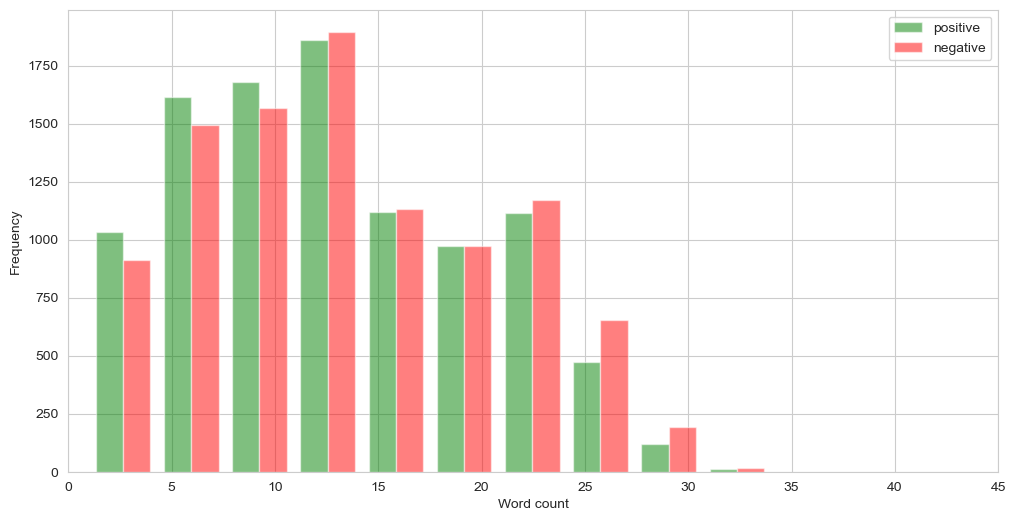

In [141]:
# plot word count distribution for both positive and negative

data['word count'] = data['text'].apply(word_count)
p = data['word count'][data.polarity == 1]
n = data['word count'][data.polarity == 0]
plt.figure(figsize=(12,6))
plt.xlim(0,45)
plt.xlabel('Word count')
plt.ylabel('Frequency')
g = plt.hist([p, n], color=['g','r'], alpha=0.5, label=['positive','negative'])
plt.legend(loc='upper right')

In [142]:
# get common words in training dataset
from collections import Counter
all_words = []
for line in list(data['text']):
    words = line.split()
    for word in words:
      if(len(word)>2):
        all_words.append(word.lower())


Counter(all_words).most_common(20)

[('the', 6503),
 ('and', 3670),
 ('you', 2969),
 ('for', 2691),
 ('have', 1836),
 ("i'm", 1658),
 ('that', 1546),
 ('but', 1536),
 ('just', 1529),
 ('with', 1445),
 ('not', 1274),
 ('was', 1274),
 ('this', 1105),
 ('are', 977),
 ('get', 976),
 ('like', 939),
 ('good', 929),
 ('all', 919),
 ('out', 855),
 ("it's", 803)]

<Axes: xlabel='polarity', ylabel='count'>

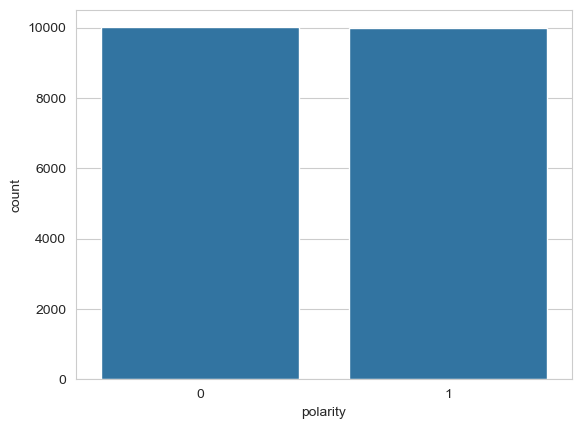

In [143]:
%matplotlib inline
sns.countplot(x=data['polarity'])

# Data Processing
## The Preprocessing steps taken are:
1. Lower Casing: Each text is converted to lowercase.
2. Removing URLs: Links starting with "http" or "https" or "www" are replaced by "".

3. Removing Usernames: Replace @Usernames with word "". (eg: "@XYZ" to "")

4. Removing Short Words: Words with length less than 2 are removed.
5. Removing Stopwords: Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. (eg: "the", "he", "have")
6. Lemmatizing: Lemmatization is the process of converting a word to its base form. (e.g: “wolves” to “wolf”)

In [144]:
# Removing the unnecessary columns.
data.drop(['date','query','user','word count'], axis=1, inplace=True)

In [145]:
data.drop('id', axis=1, inplace=True)
data.head(10)

,polarity,text
842281,1,my sleepy head http://twitpic.com/3n98u
545117,0,...Even though sleep will probably be a little...
921017,1,@waxinglyrical Paperbag ? I think it's for hyp...
1226449,1,is going to sleep after watching Maria Watches...
30406,0,She's too busy to read my blabs.
913554,1,Bout to go to bed... Happy Mother's Day ladies...
237453,0,Q: by @nprLianeHansen &quot;Favorite childhood...
1012031,1,shares 'Linka:In da house part 2' - http://ti...
29836,0,"wow its already 12:30pm, I think i should go t..."
1287021,1,im away to get breakfast with @mini_moop. brb ...


In [146]:
#Checking if any null values present
(data.isnull().sum() / len(data))*100

polarity    0.0
text        0.0
dtype: float64

In [147]:
#convrting pandas object to a string type
data['text'] = data['text'].astype('str')

In [148]:
nltk.download('stopwords')
stopword = set(stopwords.words('english'))
print(stopword)

{"don't", 'where', 'she', "they'll", 'mightn', "we've", 'each', 'an', 'himself', 'who', "it'd", 'herself', 'won', 'their', "he's", "they'd", 'hadn', 've', "weren't", 'my', 'so', 'off', "hadn't", 'themselves', 'as', 'which', 'than', 'is', "shan't", "he'd", "we'll", 'will', 'didn', 'of', 'up', 'that', 'in', 'its', 'both', 'now', "aren't", 's', "you're", 'after', 'being', 'll', 'does', 'by', "mightn't", "you'd", 'do', 'very', "she'll", 'whom', 'has', "i'll", 'own', 'here', 'needn', 'but', 'all', 'further', 'such', 'can', 'some', 'hasn', 'theirs', "he'll", 'be', "isn't", 'between', 'what', "should've", 'then', 'under', 'no', 'been', 'don', "didn't", "it's", 'd', 'and', 'i', 'did', 'isn', 'over', 'to', 'ain', "i'd", 'should', 'any', 't', 'he', 'against', 'on', "wouldn't", 'again', 'for', "shouldn't", 'those', 'too', 'a', "doesn't", 'same', "she'd", 'into', 'shouldn', 'yourselves', 'having', "wasn't", 'only', 'with', 'me', "hasn't", 'are', 'it', "they've", 'o', 'aren', 'his', 'this', 'few', 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zhaijingjing/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [149]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/zhaijingjing/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/zhaijingjing/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/zhaijingjing/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [150]:
urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
userPattern = '@[^\s]+'
def process_tweets(tweet):
  # Lower Casing
    tweet = tweet.lower()
    #tweet=tweet[1:]
    # Removing all URls
    tweet = re.sub(urlPattern,'',tweet)
    # Removing all @username.
    tweet = re.sub(userPattern,'', tweet)
    #Remove punctuations
    tweet = tweet.translate(str.maketrans("","",string.punctuation))
    #tokenizing words
    tokens = word_tokenize(tweet)
    #Removing Stop Words
    #final_tokens = [w for w in tokens if w not in stopword]
    final_tokens = tokens
    #reducing a word to its word stem
    wordLemm = WordNetLemmatizer()
    finalwords=[]
    negation_words = {"not", "no", "never", "n't"}
    prev_neg = False

    for w in final_tokens:
      if len(w)>1:
        word = wordLemm.lemmatize(w)
        #finalwords.append(word)
        if word in negation_words:
          prev_neg = True
        elif prev_neg:
          finalwords.append("not_" + word)
          prev_neg = False
        else:
          finalwords.append(word)
    return ' '.join(finalwords)

In [151]:
data['processed_tweets'] = data['text'].apply(lambda x: process_tweets(x))
print('Text Preprocessing complete.')

Text Preprocessing complete.


In [152]:
data.head(10)

,polarity,text,processed_tweets
842281,1,my sleepy head http://twitpic.com/3n98u,my sleepy head
545117,0,...Even though sleep will probably be a little...,even though sleep will probably be little hard...
921017,1,@waxinglyrical Paperbag ? I think it's for hyp...,paperbag think it for hyperventilation not_ast...
1226449,1,is going to sleep after watching Maria Watches...,is going to sleep after watching maria watch o...
30406,0,She's too busy to read my blabs.,shes too busy to read my blabs
913554,1,Bout to go to bed... Happy Mother's Day ladies...,bout to go to bed happy mother day lady especi...
237453,0,Q: by @nprLianeHansen &quot;Favorite childhood...,by quotfavorite childhood candy skybar yoursqu...
1012031,1,shares 'Linka:In da house part 2' - http://ti...,share linkain da house part
29836,0,"wow its already 12:30pm, I think i should go t...",wow it already 1230pm think should go to sleep
1287021,1,im away to get breakfast with @mini_moop. brb ...,im away to get breakfast with brb mate xx


# Analyzing the data

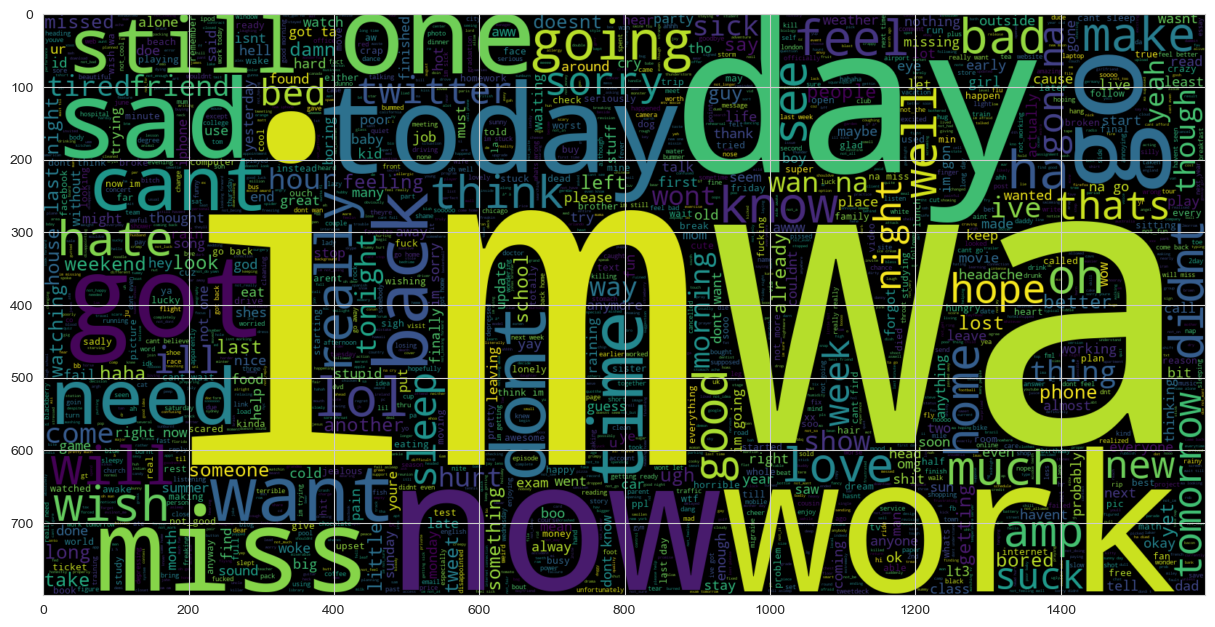

In [153]:
# Word-Cloud for Negative tweets
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.polarity == 0].processed_tweets))
plt.imshow(wc , interpolation = 'bilinear')

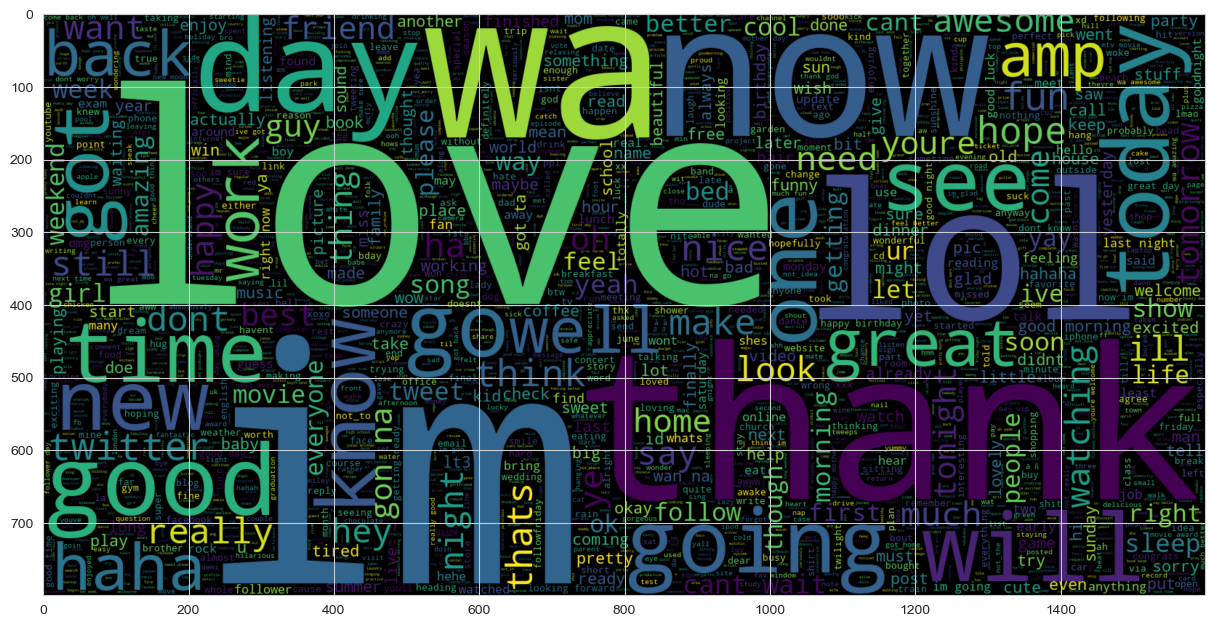

In [154]:
# Word-Cloud for Positive tweets
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.polarity == 1].processed_tweets))
plt.imshow(wc , interpolation = 'bilinear')

In [155]:
# Vectorization and Splitting the dat
X = data['processed_tweets'].values
y = data['polarity'].values

print(X.shape)
print(y.shape)

(20000,)
(20000,)


In [156]:
# Convert text to word frequency vectors
#Convert a collection of raw documents to a matrix of TF-IDF features.
vector = TfidfVectorizer(sublinear_tf=True)
X = vector.fit_transform(X)
print(f'Vector fitted.')
print('No. of feature_words: ', len(vector.get_feature_names_out()))

print(vector.get_feature_names_out()[:10])

Vector fitted.
No. of feature_words:  22651
['00' '003' '01' '02' '0330' '05' '051' '0545' '06' '07']


In [157]:
print(X.shape)
print(y.shape)

(20000, 22651)
(20000,)


# Traning preprocessing

In [158]:
# Split train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=101)
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (16000, 22651)
y_train (16000,)
X_test (4000, 22651)
y_test (4000,)


In [159]:
# Model evaluating function
def model_Evaluate(model):
    #accuracy of model on training data
    acc_train=model.score(X_train, y_train)
    #accuracy of model on test data
    acc_test=model.score(X_test, y_test)

    print('Accuracy of model on training data : {}'.format(acc_train*100))
    print('Accuracy of model on testing data : {} \n'.format(acc_test*100))

    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))

    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Reds',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

# Machine Learning Methods

Accuracy of model on training data : 85.925
Accuracy of model on testing data : 74.825 

              precision    recall  f1-score   support

           0       0.76      0.74      0.75      2038
           1       0.74      0.76      0.75      1962

    accuracy                           0.75      4000
   macro avg       0.75      0.75      0.75      4000
weighted avg       0.75      0.75      0.75      4000



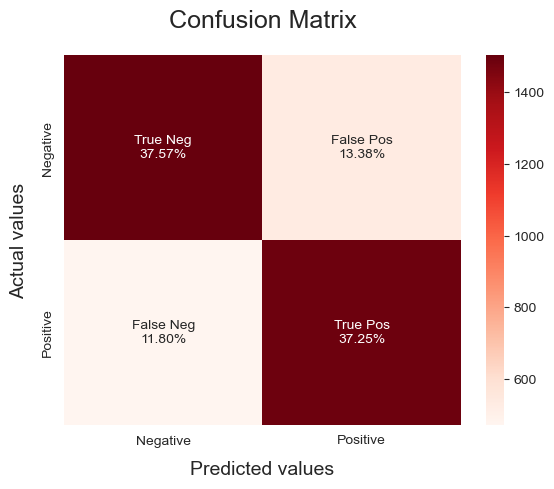

In [160]:
# Logistic Regression
lg = LogisticRegression()
history=lg.fit(X_train, y_train)
model_Evaluate(lg)

Accuracy of model on training data : 95.025
Accuracy of model on testing data : 73.95 

              precision    recall  f1-score   support

           0       0.75      0.73      0.74      2038
           1       0.73      0.75      0.74      1962

    accuracy                           0.74      4000
   macro avg       0.74      0.74      0.74      4000
weighted avg       0.74      0.74      0.74      4000



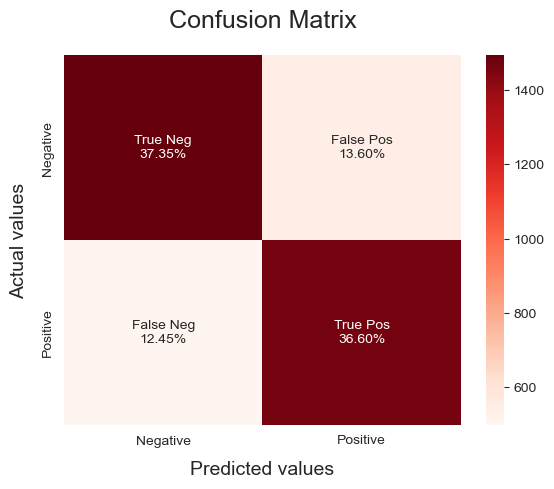

In [161]:
# Linear SVM
svm = LinearSVC()
svm.fit(X_train, y_train)
model_Evaluate(svm)

Accuracy of model on training data : 86.88125
Accuracy of model on testing data : 70.775 

              precision    recall  f1-score   support

           0       0.73      0.69      0.71      2038
           1       0.69      0.73      0.71      1962

    accuracy                           0.71      4000
   macro avg       0.71      0.71      0.71      4000
weighted avg       0.71      0.71      0.71      4000



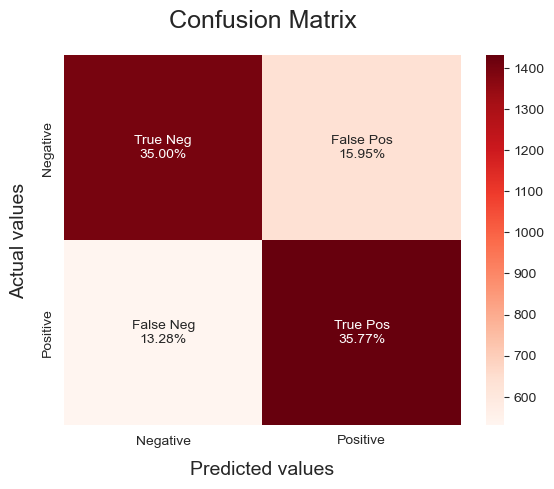

In [162]:
# Random Forest
rf = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', max_depth=50)
rf.fit(X_train, y_train)
model_Evaluate(rf)

Accuracy of model on training data : 88.53750000000001
Accuracy of model on testing data : 74.625 

              precision    recall  f1-score   support

           0       0.76      0.74      0.75      2038
           1       0.73      0.76      0.75      1962

    accuracy                           0.75      4000
   macro avg       0.75      0.75      0.75      4000
weighted avg       0.75      0.75      0.75      4000



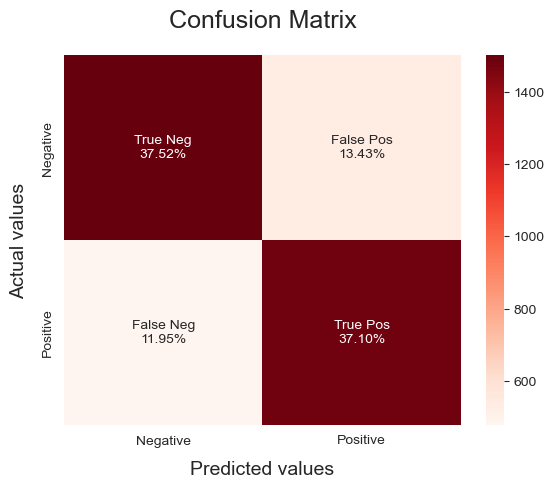

In [163]:
# Naive Bayes
nb = BernoulliNB()
nb.fit(X_train, y_train)
model_Evaluate(nb)

# RNN - LSTM

In [164]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import re
import keras
from keras import regularizers
from keras.models import Sequential
from keras import layers
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint


## Converting text data into sequences

In [165]:
# Define the 5000 most common words
max_words = 5000
# Define the maximum length of each sequence (number of words per tweet)
max_len = 200

# Initialize the tokenizer, keeping only the top 'max_words' most frequent words
tokenizer = Tokenizer(num_words=max_words)
# Fit the tokenizer on the processed tweets to build the word index
tokenizer.fit_on_texts(data.processed_tweets)
# Convert each tweet (text) into a sequence of integer indices based on the word index
sequences = tokenizer.texts_to_sequences(data.processed_tweets)

# Pad or truncate all sequences to the same length ('max_len')
# - If a sequence is shorter than 'max_len', it will be padded with zeros at the beginning.
# - If a sequence is longer than 'max_len', it will be truncated from the beginning.
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

[[  0   0   0 ...   4 783 318]
 [  0   0   0 ...  55  59  83]
 [  0   0   0 ... 132  26  82]
 ...
 [  0   0   0 ... 358 392 564]
 [  0   0   0 ... 231  15  39]
 [  0   0   0 ...  47  13  91]]


## Split Traning and Test data

In [166]:
train_data, test_data, train_label, test_label = train_test_split(tweets, data.polarity.values, test_size=0.2, random_state=101)
print(np.unique(train_label))
print(np.unique(test_label))

[0 1]
[0 1]


## Creating and Traning LSTM Model

In [167]:
# Initialize a sequential model
model2 = Sequential()

# Embedding layer: Converts word indices into dense vectors of fixed size
# - max_words: Vocabulary size (5000 words)
# - 128: Each word is represented as a 128-dimensional vector
model2.add(layers.Embedding(max_words, 64))

# LSTM layer: Captures sequential dependencies in the text data
# - 64: Number of LSTM units (memory cells)
# - dropout=0.5: Randomly drops 50% of connections to prevent overfitting
model2.add(layers.LSTM(32,dropout=0.3, recurrent_dropout=0.1))

# Hidden layers with ReLU activation
model2.add(layers.Dense(16, activation='relu'))  # First hidden layer with 16 neurons
model2.add(layers.Dense(16, activation='relu'))   # Second hidden layer

# Output layer with a sigmoid activation function for binary classification
model2.add(layers.Dense(1,activation='sigmoid'))

# Compile the model
# - optimizer='adam': Adam optimizer for efficient training
# - loss='binary_crossentropy': Loss function for binary classification
# - metrics=['accuracy']: Evaluates model performance using accuracy
model2.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on the training data
history = model2.fit(
    train_data, train_label,  # Training data and labels
    epochs=10,  # Train for 10 epochs
    validation_data=(test_data, test_label),  # Use test data for validation
    verbose=2
)

Epoch 1/10
500/500 - 33s - 65ms/step - accuracy: 0.6894 - loss: 0.5791 - val_accuracy: 0.7505 - val_loss: 0.5119
Epoch 2/10
500/500 - 31s - 62ms/step - accuracy: 0.7962 - loss: 0.4457 - val_accuracy: 0.7577 - val_loss: 0.5044
Epoch 3/10
500/500 - 31s - 61ms/step - accuracy: 0.8254 - loss: 0.3951 - val_accuracy: 0.7570 - val_loss: 0.5228
Epoch 4/10
500/500 - 31s - 61ms/step - accuracy: 0.8475 - loss: 0.3498 - val_accuracy: 0.7590 - val_loss: 0.5575
Epoch 5/10
500/500 - 30s - 60ms/step - accuracy: 0.8668 - loss: 0.3049 - val_accuracy: 0.7467 - val_loss: 0.6653
Epoch 6/10
500/500 - 30s - 60ms/step - accuracy: 0.8810 - loss: 0.2665 - val_accuracy: 0.7450 - val_loss: 0.7315
Epoch 7/10
500/500 - 30s - 60ms/step - accuracy: 0.8977 - loss: 0.2337 - val_accuracy: 0.7387 - val_loss: 0.7846
Epoch 8/10
500/500 - 31s - 61ms/step - accuracy: 0.9106 - loss: 0.2095 - val_accuracy: 0.7465 - val_loss: 0.8678
Epoch 9/10
500/500 - 30s - 60ms/step - accuracy: 0.9198 - loss: 0.1845 - val_accuracy: 0.7300 - 

In [168]:

model2.summary()
print("Optimizer:", model2.optimizer)
print("Loss function:", model2.loss)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (32, 200, 64)          │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (32, 32)               │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (32, 16)               │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (32, 16)               │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (32, 1)                │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 999,701 (3.81 MB)

 Trainable params: 333,233 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 666,468 (2.54 MB)

Optimizer: <keras.src.optimizers.adam.Adam object at 0x3839e1c70>
Loss function: binary_crossentropy


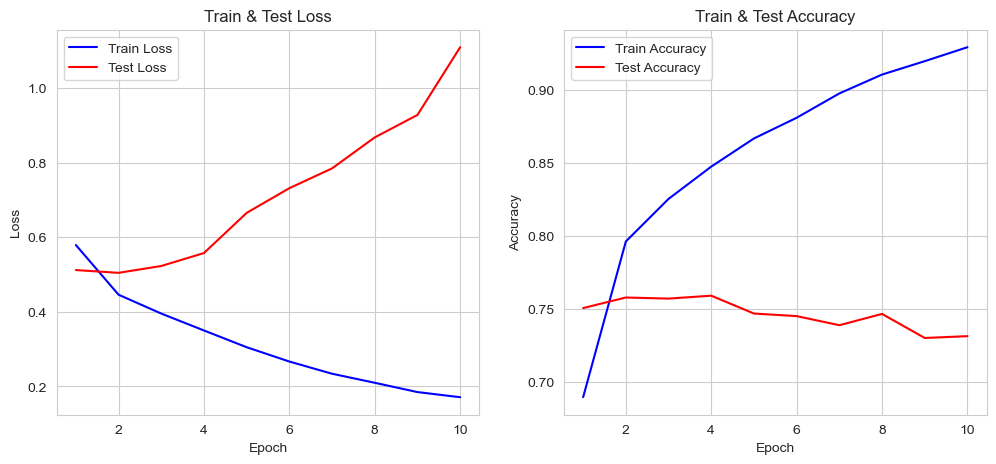

In [169]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].plot(range(1, len(history.history['loss']) + 1), history.history['loss'], label='Train Loss', color='blue')
axes[0].plot(range(1, len(history.history['val_loss']) + 1), history.history['val_loss'], label='Test Loss', color='red')
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("Loss")
axes[0].set_title("Train & Test Loss")
axes[0].legend()

axes[1].plot(range(1, len(history.history['accuracy']) + 1), history.history['accuracy'], label='Train Accuracy', color='blue')
axes[1].plot(range(1, len(history.history['val_accuracy']) + 1), history.history['val_accuracy'], label='Test Accuracy', color='red')
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Accuracy")
axes[1].set_title("Train & Test Accuracy")
axes[1].legend()

## Test the Model

In [170]:
def testModel(model, text):
    # model = keras.models.load_model('rnn_model.keras')
    sequence = tokenizer.texts_to_sequences([text])
    test = pad_sequences(sequence, maxlen=max_len)
    pred = model.predict(test)
    pred_value = pred[0][0]
    print(f'Prediction: {pred_value * 100:.2f}%')

    if pred_value > 0.5:
        print('Positive:', text)
    else:
        print('Negative:', text)

In [171]:
testModel(model2,str('this data science article is the worst ever'))
testModel(model2,str('this data science article is the best ever'))
testModel(model2,str('I had a bad day at work.'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
Prediction: 23.20%
Negative: this data science article is the worst ever
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Prediction: 99.97%
Positive: this data science article is the best ever
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Prediction: 1.12%
Negative: I had a bad day at work.
